In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from scipy import integrate

In [2]:
from bs4 import BeautifulSoup # For HTML parsing
import requests
import urlparse
import re # Regular expressions
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
#from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import nltk
import pandas as pd # For converting results to a dataframe and bar chart plots
%matplotlib inline

In [3]:
import datetime
import seaborn as sns
sns.set_context("poster")
sns.set(palette='Set2')

## Now, I'm going to learn  Beautiful Soup:

#### Tag:

In [4]:
soup = BeautifulSoup('<b class="boldest">Extremely bold</b>',"html.parser")
tag = soup.b
type(tag)

bs4.element.Tag

A tag has a name (say, "someTag"). It contains a set of attribute:value(s). The following is an example of the structure of a tag:

$\text{<someTag attr1="value" attr2="value1 value2">  A String  </someTag>}$

In [39]:
print tag.name
print tag["class"]
print tag.attrs

b
['boldest']
{'class': ['boldest']}


i.e. we can use .attrs to show the dictionary of a specified tag (attr, value).

Also, the things within the begin and the end tag (i.e. within $<b>$ and $</b>$) are strings:

In [40]:
print type(tag.string)
print tag.string

<class 'bs4.element.NavigableString'>
Extremely bold


These strings are objects of the type NavigableString. i.e. we can do further actions such as to find its direct parent:

In [77]:
print tag.string.parent                   # a NavigableString obj
print unicode(tag.string.parent)          # a unicode string
print repr(unicode(tag.string.parent))    # a unicode string (in repr(), if the string is "unicode" encoded, it will begin by u')

#check the types of the above stuffs:
print type(tag.string.parent)             
print type(unicode(tag.string.parent))
print type(repr(unicode(tag.string.parent)))

<p class="story">...</p>
<p class="story">...</p>
u'<p class="story">...</p>'
<class 'bs4.element.Tag'>
<type 'unicode'>
<type 'str'>


or find its parent's parent(now we have the easiest situation, i.e. they have only one direct parent):

In [46]:
print tag.string.parent.parent

<body><b class="boldest">Extremely bold</b></body>


The most common multi-valued attribute is class:

In [47]:
css_soup = BeautifulSoup('<p class="body strikeout"></p>')
print css_soup.p['class']
# ["body", "strikeout"]

css_soup = BeautifulSoup('<p class="body strikeout"></p>', "lxml")
print css_soup.p['class']

['body', 'strikeout']
['body', 'strikeout']


on the other hand, id is not a multi-valued attribute:

In [9]:
id_soup = BeautifulSoup('<p id="my id"></p>')
id_soup.p['id']
# 'my id'

'my id'

Now, let's see a slightly complex situation:

In [46]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were</p>
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""
soup = BeautifulSoup(html_doc, 'html.parser')

First of all, let's see the prettified structure:

In [47]:
print soup.prettify()

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
  </p>
  <a class="sister" href="http://example.com/elsie" id="link1">
   Elsie
  </a>
  ,
  <a class="sister" href="http://example.com/lacie" id="link2">
   Lacie
  </a>
  and
  <a class="sister" href="http://example.com/tillie" id="link3">
   Tillie
  </a>
  ;
and they lived at the bottom of a well.
 </body>
</html>
<p class="story">
 ...
</p>



In [48]:
print soup.p

<p class="title"><b>The Dormouse's story</b></p>


#### the "find_all" method, as well as tag.name, tag.attrs, tag.string, tag['attrName']

apparently, the above is not what I want. I actually would like to obtain all the tags which is labeled as "p". This can be achieved by taking the advantage of the method "find_all":

In [52]:
for tag in soup.find_all("p"):
    print tag
    print tag.name
    print tag.attrs
    print tag["class"]
    print type(tag["class"][0])
    print tag.string
    print "==================================================================================================="

<p class="title"><b>The Dormouse's story</b></p>
p
{u'class': [u'title']}
[u'title']
<type 'unicode'>
The Dormouse's story
<p class="story">Once upon a time there were three little sisters; and their names were</p>
p
{u'class': [u'story']}
[u'story']
<type 'unicode'>
Once upon a time there were three little sisters; and their names were
<p class="story">...</p>
p
{u'class': [u'story']}
[u'story']
<type 'unicode'>
...


move from unicode to ascii:

In [81]:
for string in soup.strings:
    print(repr(string))
    print repr(string.encode("ascii"))
    print

u'\n'
'\n'

u"The Dormouse's story"
"The Dormouse's story"

u'\n'
'\n'

u'\n'
'\n'

u"The Dormouse's story"
"The Dormouse's story"

u'\n'
'\n'

u'Once upon a time there were three little sisters; and their names were'
'Once upon a time there were three little sisters; and their names were'

u'\n'
'\n'

u'Elsie'
'Elsie'

u',\n'
',\n'

u'Lacie'
'Lacie'

u' and\n'
' and\n'

u'Tillie'
'Tillie'

u';\nand they lived at the bottom of a well.'
';\nand they lived at the bottom of a well.'

u'\n'
'\n'

u'...'
'...'

u'\n'
'\n'



So many spaces there. The spaces can be removed via stripping the strings:

In [84]:
for string in soup.stripped_strings:
    print(repr(string.encode("ascii")))

"The Dormouse's story"
"The Dormouse's story"
'Once upon a time there were three little sisters; and their names were'
'Elsie'
','
'Lacie'
'and'
'Tillie'
';\nand they lived at the bottom of a well.'
'...'


Well, we could also put all the stripped strings into a list:

In [85]:
[repr(string.encode("ascii")) for string in soup.stripped_strings]

['"The Dormouse\'s story"',
 '"The Dormouse\'s story"',
 "'Once upon a time there were three little sisters; and their names were'",
 "'Elsie'",
 "','",
 "'Lacie'",
 "'and'",
 "'Tillie'",
 "';\\nand they lived at the bottom of a well.'",
 "'...'"]

In [86]:
print soup.prettify()

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
  </p>
  <a class="sister" href="http://example.com/elsie" id="link1">
   Elsie
  </a>
  ,
  <a class="sister" href="http://example.com/lacie" id="link2">
   Lacie
  </a>
  and
  <a class="sister" href="http://example.com/tillie" id="link3">
   Tillie
  </a>
  ;
and they lived at the bottom of a well.
 </body>
</html>
<p class="story">
 ...
</p>



#### parents and descendents

In [89]:
link = soup.a
print link
print 
# <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
for parent in link.parents:
    if parent is None:
        print(parent)
    else:
        print(parent.name)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

body
html
[document]


We've successfully found the parent of the specified tag. This can be verified by seeing the structure obtained from the method soup.prettify().

In [90]:
print soup.name

for child in soup.children:
    print child

[document]


<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were</p>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</body></html>


<p class="story">...</p>




The above result is understandable since from the method soup.prettify() we know already that $<html>$ and $<p>$ are the direct children of the parent $[document]$.

Now, let's see its descendants:

In [63]:
print soup.body.name
print type(soup.body.descendants)

for child in soup.body.descendants:
    print child

body
<type 'generator'>


<p class="title"><b>The Dormouse's story</b></p>
<b>The Dormouse's story</b>
The Dormouse's story


<p class="story">Once upon a time there were three little sisters; and their names were</p>
Once upon a time there were three little sisters; and their names were


<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
Elsie
,

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
Lacie
 and

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
Tillie
;
and they lived at the bottom of a well.


Say, I'd like to get all the strings of all the "p" tags. How to do this? Let's see:

In [62]:
for single_tag in soup.find_all("p"):
    for string in single_tag:
        print string

<b>The Dormouse's story</b>
Once upon a time there were three little sisters; and their names were
...


In [3]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [14]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

In [16]:
print soup.find_all("p")[0]
print soup.find_all("p")[0].get("class")

<p class="title"><b>The Dormouse's story</b></p>
[u'title']


In [5]:
print soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [32]:
for link in soup.find_all('a'):
    print type(link)
    print(link.get('href'))

<class 'bs4.element.Tag'>
http://example.com/elsie
<class 'bs4.element.Tag'>
http://example.com/lacie
<class 'bs4.element.Tag'>
http://example.com/tillie


#### generator and iterator

I now have the problem about the type "generator". I'd like to understand both the types "generator" and "iterator" in Python better.

In [9]:
a = [1, 2, 3, 4]
b=123
print type(a.__iter__)
print type(a.__init__)
print type(b.__init__)
print type(b.__iter__)

<type 'method-wrapper'>
<type 'method-wrapper'>
<type 'method-wrapper'>


AttributeError: 'int' object has no attribute '__iter__'

>When Python executes the for loop, it first invokes the $__iter__()$ method of the container to get the iterator of the container. It then repeatedly calls the next() method $__next__()$ method in Python 3.x) of the iterator until the iterator raises a StopIteration exception. Once the exception is raised, the for loop ends.

which means that a list is iterable. More details see: http://www.shutupandship.com/2012/01/understanding-python-iterables-and.html

Let's quote the summary from that site (written by Praveen Gollakota):
>If you define a custom container class, think about whether it should also be an iterable. 
It is quite easy to make a class support the iterator protocol. 
Doing so will make the syntax more natural.

If I can't recall what the above summary says or how to make a class iterable in the future, I'll visit that website again.

Now, let's continue. What is a generator in Python?

In [32]:
# Using the generator pattern (an iterable)
class firstn(object):
    def __init__(self, n):
        self.n = n
        self.num, self.nums = 0, []
    def __iter__(self):
        return self
    # Python 3 compatibility
    def __next__(self):                  # Okay, I knew this. In Python3 one should be using __next__.
        return self.next()
    def next(self):
        if self.num < self.n:
            cur, self.num = self.num, self.num+1
            return cur
        else:
            raise StopIteration()

In [33]:
print type(firstn(3))
for j in firstn(3):
    print j
print
a=firstn(3)
for _ in range(3):
    print a.next()

<class '__main__.firstn'>
0
1
2

0
1
2


Well, this I understand. The above is nothing but the concept of the iterator.



> (https://wiki.python.org/moin/Generators)

>Python provides generator functions as a convenient shortcut to building iterators. Lets us rewrite the above iterator as a generator function: 

In [34]:
def firstn(n):
    num = 0
    while num < n:
        yield num
        num += 1

In [38]:
a=firstn(3)
for a in firstn(3):
    print a

0
1
2


I got it. In this way, the iterator can be built easier. That's it. I think 1) the design pattern of the generator is simpler than the design pattern of the iterator. 2) their behave should be the same.

Now, due to the string we have got has a special type (NavigableString), we can find the direct parent of these special strings.

In [48]:
print [soup.find_all("p")[j].string for j in range(3)][1].parent.parent

<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were</p>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</body>


Now, let's see if we can print out all the strings of the site:

In [67]:
for string in soup.strings:
    print(repr(string))
    print((string))
    print(type(string))
    print"======================================"

u'\n'


<class 'bs4.element.NavigableString'>
u"The Dormouse's story"
The Dormouse's story
<class 'bs4.element.NavigableString'>
u'\n'


<class 'bs4.element.NavigableString'>
u'\n'


<class 'bs4.element.NavigableString'>
u"The Dormouse's story"
The Dormouse's story
<class 'bs4.element.NavigableString'>
u'\n'


<class 'bs4.element.NavigableString'>
u'Once upon a time there were three little sisters; and their names were'
Once upon a time there were three little sisters; and their names were
<class 'bs4.element.NavigableString'>
u'\n'


<class 'bs4.element.NavigableString'>
u'Elsie'
Elsie
<class 'bs4.element.NavigableString'>
u',\n'
,

<class 'bs4.element.NavigableString'>
u'Lacie'
Lacie
<class 'bs4.element.NavigableString'>
u' and\n'
 and

<class 'bs4.element.NavigableString'>
u'Tillie'
Tillie
<class 'bs4.element.NavigableString'>
u';\nand they lived at the bottom of a well.'
;
and they lived at the bottom of a well.
<class 'bs4.element.NavigableString'>
u'\n'


<class 'bs4.element.Navi

or the stripped strings(unnecessary spaces are removed)

In [70]:
for string in soup.stripped_strings:
    print(repr(string))

u"The Dormouse's story"
u"The Dormouse's story"
u'Once upon a time there were three little sisters; and their names were'
u'Elsie'
u','
u'Lacie'
u'and'
u'Tillie'
u';\nand they lived at the bottom of a well.'
u'...'


#### Siblings:

In [72]:
sibling_soup = BeautifulSoup("<a><b>text1</b><c>text2</c></b></a>","lxml")
print(sibling_soup.prettify())

<html>
 <body>
  <a>
   <b>
    text1
   </b>
   <c>
    text2
   </c>
  </a>
 </body>
</html>


In [88]:
print sibling_soup.b.next_sibling
print sibling_soup.b.previous_sibling

<c>text2</c>
None


In [89]:
print sibling_soup.c.next_sibling
print sibling_soup.c.previous_sibling

None
<b>text1</b>


back to the soup example. Let's find the siblings of the tag "a" in an iterating way.

In [93]:
print type(soup.a.next_siblings)

<type 'generator'>


apparently, it is a generator. So, we can do the following:

In [91]:
for sibling in soup.a.next_siblings:
    print(repr(sibling))

u',\n'
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
u' and\n'
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
u';\nand they lived at the bottom of a well.'


#### learn: the function map and filter

In [19]:
a=["aaa","bbb","aac","caa","def"]
print 'aa' in 'aaa'
print map(lambda x:'aa' in x, a)
print filter(lambda x:'aa' in x, a)

True
[True, False, True, True, False]
['aaa', 'aac', 'caa']


#### learn: the function reduce

In [57]:
print reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])
final_site_list = ['http://www.indeed.com/jobs?q=%22','data+scientist', '%22&l=', 'New+York']
print reduce(lambda x,y: x+y,final_site_list)
print "".join(final_site_list)

15
http://www.indeed.com/jobs?q=%22data+scientist%22&l=New+York
http://www.indeed.com/jobs?q=%22data+scientist%22&l=New+York


#### learn: the usage of Counter:

In [119]:
a=Counter({"a":1,"b":3})
print a
print a["b"]

Counter({'b': 3, 'a': 1})
3


In [36]:
cnt=Counter()
cnt.update(['red', 'blue', 'red', 'green', 'blue', 'blue'])
print cnt

Counter({'blue': 3, 'red': 2, 'green': 1})


In [14]:
cnt = Counter()
for word in ['red', 'blue', 'red', 'green', 'blue', 'blue']:
    cnt[word] += 1
print cnt
cnt.update(['red', 'blue', 'red', 'green', 'blue', 'blue'])
print cnt

Counter({'blue': 3, 'red': 2, 'green': 1})
Counter({'blue': 6, 'red': 4, 'green': 2})


In [63]:
print cnt.items()
print type(cnt.items())

[('blue', 6), ('green', 2), ('red', 4)]
<type 'list'>


#### some very basic exercises about the pandas dataframe:

it accepts numpy array or dictionary-like inputs. Say, let's import data from a set of dictionary:|

In [15]:
frame=pd.DataFrame(cnt.items(), columns = ['color', 'numColor'])

(0, 7)

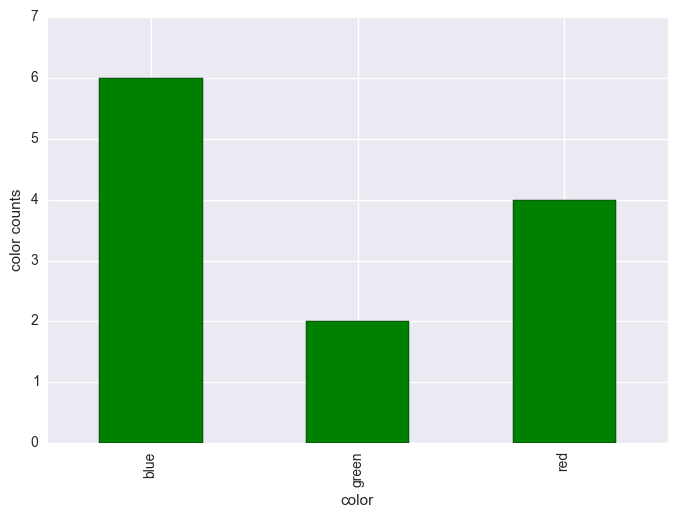

In [16]:
ax=frame.plot(x = 'color', kind = 'bar', legend = None,color='green')
ax.set_xlabel("color")
ax.set_ylabel("color counts")
ax.set_ylim(0,7)

In [18]:
np.asarray([[1,2,3,4],[5,6,7,8]])

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

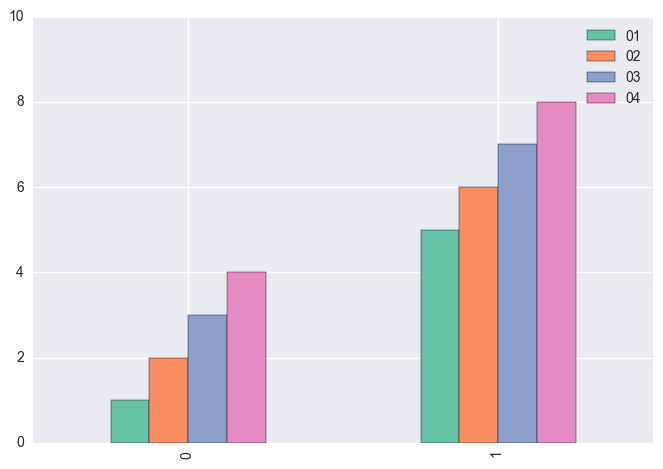

In [19]:
frame=pd.DataFrame(np.asarray([[1,2,3,4],[5,6,7,8]]), columns = ['01', '02','03','04'])
ax=frame.plot( kind = 'bar')
ax.set_ylim(0,10)
fig = ax.get_figure()
fig.savefig("tmp.svg")

In [109]:
frame.tail()

,01,02,03,04
0,1,2,3,4
1,5,6,7,8


#### the "get_text" method from Beautifulsoup:

In [15]:
soup.get_text("|",strip=True)

u"Data Scientist job - Indeed - Seattle, WA | Indeed.com|Skip to|Job Description|,|Search|Close|Find Jobs|Find Resumes|Employers / Post Job|Upload your resume|Sign in|:|What|Where|Advanced Job Search|job title, keywords or company|city, state, or zip|Data Scientist|Indeed|133 reviews|-|Seattle, WA|This job posting is no longer available on Indeed.|Find similar jobs:|Data Scientist jobs|-|Indeed jobs|How A Data Scientist Works|As a Data Scientist at Indeed your role is to follow the data. Analyze, visualize, and model job search related data. You will build and implement machine learning models to make timely decisions. You will have access to unparalleled resources within Indeed to grow and develop both personally and professionally.|We are looking for a mixture between a statistician, scientist, machine learning expert and engineer: someone who has passion for building and improving Internet-scale products informed by data. The ideal candidate understands human behavior and knows what

#### get to know the Python built-in methods "strip", "splitlines" and "split":

In [102]:
# splitlines:
# (code example from "https://www.tutorialspoint.com/python/string_splitlines.htm)
    
str = "Line1-a b c d e f\nLine2- a b c\n\nLine4- a b c d";
print str.splitlines( )            # the line will break into lines according to the line break \n
print str.splitlines(1)            # line breaks will be included within the splitted string

# strip: 
# (code example from "https://www.tutorialspoint.com/python/string_strip.htm")


print repr("0000000this is string example....\nwow!!!0000000".strip('0'))       # the chars"0" at the both ends 
                                                                                #  of the string will be removed.
print repr("    0000000this is string example....\nwow!!!0000000    ".strip())  # the empty spaces will be removed.

print '1,,2'.split(',')
print '1,,2  345'.split()

['Line1-a b c d e f', 'Line2- a b c', '', 'Line4- a b c d']
['Line1-a b c d e f\n', 'Line2- a b c\n', '\n', 'Line4- a b c d']
'this is string example....\nwow!!!'
'0000000this is string example....\nwow!!!0000000'
['1', '', '2']
['1,,2', '345']


#### understand the regular expression in Python (re.match, re.sub, re.findall):

(https://www.tutorialspoint.com/python/python_reg_expressions.htm)

In [161]:
print "-----------------------------------"
print "tests of 're.match':"
print "-----------------------------------"

m=re.match(r'(bcd){2}',"bcdbcd")
print "re:(bcd){2} string: bcdbcd","match:",repr(m.group())

m=re.match(r'[a-zA-Z][3]{2}',"a33")
print "re:[a-zA-Z][3]{2} string: a33","match:",repr(m.group())

m=re.match(r'[a-zA-Z].+3',"f42312d")
print repr(m.group())
print "re:[a-zA-Z].+3 string: f42312d","match:",repr(m.group())

m = re.match(r"(\d+b)(\d{3})", "24b1632")
print "re:(\d+b)(\d{3}) string: 24b1632","match:",repr(m.group())
print "m.groups():",m.groups() # according to the parenthesis in re, the string will be split into different groups.

print "-----------------------------------"
print "tests of 're.match' with try&catch:"
print "-----------------------------------"

try:
    m=re.match(r'(d3.js)',">")
    print repr(m.group())
except AttributeError:
    print "the re and the string does not match!"
except Exception:   # catch Exception if AttributeError is not the cause
    print "what's happening there?"

try:
    m=re.match(r'(d3.js)',">","123454321")
    print repr(m.group())
except AttributeError:
    print "the re and the string does not match!"
except Exception:   # catch Exception if AttributeError is not the cause
    print "Oops, something wrong!"

print "-----------------------------------"
print "tests of 're.sub':"
print "-----------------------------------"

print "re:\d{2}.* string: 11 2 3 123 abc cde replacement: 00","\nresult:",re.sub(r"\d{2}.*","00", "11 2 3 123 abc cde\n")
print "re:\d{2} string: 11 2 3 123 abc cde replacement: 00","\nresult:",re.sub(r"\d{2}","00", "11 2 3 123 abc cde\n")

# the following line will remove any element of the string 
# which is not within this list: [any alphabets(case irrelevant), ., 3, +]
print "re:[^a-zA-Z.3+] string: #c--d++e**1234.5 replacement: '' ","\nresult:",re.sub(r'[^a-zA-Z.3+]',"", "#c--d++e**1234.5\n")

print "-----------------------------------"
print "tests of 're.findall':"
print "-----------------------------------"

print repr(re.findall(r'\d+',"Jobs 1 to 10 of 382"))

-----------------------------------
tests of 're.match':
-----------------------------------
re:(bcd){2} string: bcdbcd match: 'bcdbcd'
re:[a-zA-Z][3]{2} string: a33 match: 'a33'
'f423'
re:[a-zA-Z].+3 string: f42312d match: 'f423'
re:(\d+b)(\d{3}) string: 24b1632 match: '24b163'
m.groups(): ('24b', '163')
-----------------------------------
tests of 're.match' with try&catch:
-----------------------------------
the re and the string does not match!
Oops, something wrong!
-----------------------------------
tests of 're.sub':
-----------------------------------
re:\d{2}.* string: 11 2 3 123 abc cde replacement: 00 
result: 00

re:\d{2} string: 11 2 3 123 abc cde replacement: 00 
result: 00 2 3 003 abc cde

re:[^a-zA-Z.3+] string: #c--d++e**1234.5 replacement: ''  
result: cd++e3.
-----------------------------------
tests of 're.findall':
-----------------------------------
['1', '10', '382']


#### recall:lambda function (http://www.secnetix.de/olli/Python/lambda_functions.hawk)

In [41]:
foo = [2, 18, 9, 22, 17, 24, 8, 12, 27]

print filter(lambda x: x % 3 == 0, foo)    # from python official doc:
                                           # filter(function, iterable)
                                           # is equivalent to [item for item in iterable if function(item)]
print map(lambda x: x * 2 + 10, foo)
print reduce(lambda x, y: x + y, foo)
print sum(foo)

[18, 9, 24, 12, 27]
[14, 46, 28, 54, 44, 58, 26, 34, 64]
139
139


#### the use of the built-in functions "split" and "join":

In [78]:
a = "Free your mind."
b = "Welcome to the desert... of the real."
c = "What is real? How do you define real?"
 
print(a)
print(a.split())
print
 
print(b)
print(b.split("o"))
print
 
print(c)
print(c.split(" ", 4))
print

print '+'.join("abc")
print '+'.join(["a","b","c"])

Free your mind.
['Free', 'your', 'mind.']

Welcome to the desert... of the real.
['Welc', 'me t', ' the desert... ', 'f the real.']

What is real? How do you define real?
['What', 'is', 'real?', 'How', 'do you define real?']

a+b+c
a+b+c


#### Now, let's do something slightly more serious:

Remark: the following functions for web crawling were originally written by Dr. Steinweg-Woods (https://jessesw.com/Data-Science-Skills/). His code was not up to date and some issues exist. I have cured some problems.

In [19]:
def skills_dict(doc_frequency):
    prog_lang_dict = Counter({'R':doc_frequency['r'], 'Python':doc_frequency['python'],
                        'Java':doc_frequency['java'], 'C++':doc_frequency['c++'],
                        'Ruby':doc_frequency['ruby'],
                        'Perl':doc_frequency['perl'], 'Matlab':doc_frequency['matlab'],
                        'JavaScript':doc_frequency['javascript'], 'Scala': doc_frequency['scala']})
    analysis_tool_dict = Counter({'Excel':doc_frequency['excel'],  'Tableau':doc_frequency['tableau'],
                            'D3.js':doc_frequency['d3.js'], 'SAS':doc_frequency['sas'],
                            'SPSS':doc_frequency['spss'], 'D3':doc_frequency['d3']})  
    hadoop_dict = Counter({'Hadoop':doc_frequency['hadoop'], 'MapReduce':doc_frequency['mapreduce'],
                    'Spark':doc_frequency['spark'], 'Pig':doc_frequency['pig'],
                    'Hive':doc_frequency['hive'], 'Shark':doc_frequency['shark'],
                    'Oozie':doc_frequency['oozie'], 'ZooKeeper':doc_frequency['zookeeper'],
                    'Flume':doc_frequency['flume'], 'Mahout':doc_frequency['mahout']})
    database_dict = Counter({'SQL':doc_frequency['sql'], 'NoSQL':doc_frequency['nosql'],
                        'HBase':doc_frequency['hbase'], 'Cassandra':doc_frequency['cassandra'],
                        'MongoDB':doc_frequency['mongodb']})
    overall_total_skills = prog_lang_dict + analysis_tool_dict + hadoop_dict + database_dict # Combine our Counter objects
    return overall_total_skills

In [29]:
def text_cleaner(url):

    try:
        session = requests.Session()   
        soup = BeautifulSoup(session.get(url, timeout=5).content, 'lxml')  # let our beautiful soup to parse the site
    except:
        print "connection error or something wrong. URL=",url
        return
    
    for script in soup(["script", "style"]):           # Remove these two unnecessary tags: "script" and "style"
        _=script.extract()                       

    stopwords = nltk.corpus.stopwords.words('english') # a list of words which are not important
                                                       # we will ignore these words if they show up in the context
    text=soup.get_text(" ",strip=True)
    text=re.sub(r"[^a-zA-Z.3+]"," ",text)              # preserve . and 3 for "d3.js". Also, preserve "+" for "c++"

    content=[w.strip(".") for w in text.lower().split() if w not in stopwords] # remove any "." if it's contained 
                                                                               # at the begin or the end of the string
    return content

In [34]:
def skills_info(city = None, state = None):
    city_title = city
    if city is None:
        city_title = 'Nationwide'

    final_site_list = ['http://www.indeed.com/jobs?q=%22','data+scientist', '%22&l=', city_title,
                    '%2C+', state]
    final_site = "".join(final_site_list)
    base_URL = "http://www.indeed.com"
    print final_site

    try:
        session = requests.Session()
        soup = BeautifulSoup(session.get(final_site).content,"lxml")
    except:
        print "connection error or something wrong. URL=",final_site
        return
        
    print soup.find(id = "searchCount")
    num_jobs_area=soup.find(id = "searchCount").string

    job_numbers = re.findall("\d+", num_jobs_area)
    if len(job_numbers) > 3: # Have a total number of jobs greater than 1000
        total_num_jobs = (int(job_numbers[2])*1000) + int(job_numbers[3])
    else:
        total_num_jobs = int(job_numbers[2])

    if(total_num_jobs%10==0):
        num_pages = total_num_jobs/10
    else:
        num_pages = 1+total_num_jobs/10

    print "num_pages=",num_pages

    job_descriptions = [] # store all our descriptions in this list
    for i in range(num_pages): # loop through all of our search result pages
    #for i in (0,):
        start_num = str(i*10) # assign the multiplier of 10 to view the pages we want
        current_page = "".join([final_site, "&start=", start_num])
        print "Getting page", i,"start_num=",start_num
        print current_page
        job_link_area = BeautifulSoup(session.get(current_page).content,"lxml") # locate all of the job links within the <body> area
        #join the URL base and the tail part of the URL using urlparse package:
        job_URLs=[urlparse.urljoin(base_URL,link.a.get('href')) for link in job_link_area.select( 'h2[class="jobtitle"]')]
        print job_URLs,len(job_URLs)

        for URL in job_URLs:
            final_description = text_cleaner(URL)
            job_descriptions.append(final_description)
            sleep(1) # so that we don't be jerks. If you have a very fast internet connection you could hit the server a lot! 

    doc_frequency=Counter()
    for item in job_descriptions:
        doc_frequency.update(item)      # add all the words to the counter table and count the frequency of each words
    #print doc_frequency.most_common(10)
    print 'Done with collecting the job postings!'
    print 'There were', len(job_descriptions), 'jobs successfully found.'

    # Obtain our key terms and store them in a dict. These are the key data science skills we are looking for
    overall_total_skills=skills_dict(doc_frequency)

    final_frame = pd.DataFrame(overall_total_skills.items(), columns = ['Term', 'NumPostings']) # Convert these terms to a 
                                                                                                # dataframe 
    # Change the values to reflect a percentage of the postings 
    final_frame.NumPostings = (final_frame.NumPostings)*100/len(job_descriptions) # Gives percentage of job postings 
                                                                                        #  having that term 

    # Sort the data for plotting purposes
    final_frame.sort_values('NumPostings', ascending = False, inplace = True)
    print final_frame
    
    today = datetime.date.today()
    # Get it ready for a bar plot
    final_plot = final_frame.plot(x = 'Term', kind = 'bar', legend = None, 
                                title = 'Percentage of Data Scientist Job Ads with a Key Skill, '+city_title+', '+str(today))
    final_plot.set_ylabel('Percentage Appearing in Job Ads')
    fig = final_plot.get_figure() # Have to convert the pandas plot object to a matplotlib object
    fig.savefig(city_title+".pdf")
    #return fig,final_frame

In [ ]:
def skills_info_TW104():
  
    final_site_list = ['https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=n104bank1&ro=0&keyword=','data+scientist',
                                               '&excludeCompanyKeyword=醫藥+生物+生技+微脂體','&order=2&asc=0','&page=','1']
    final_site = "".join(final_site_list)
    print final_site
    
    base_URL = "https://www.104.com.tw/"
    country="Taiwan"

    try:
        session = requests.Session()
        soup = BeautifulSoup(session.get(final_site).content,"lxml")
    except:
        print "connection error or something wrong. URL=",final_site
        return
    #print soup.find(class_="joblist_bar")
    num_jobs_area=soup.select('li[class="right"]')
    #print type(num_jobs_area)
    #print num_jobs_area[0]
    total_num_jobs = int( re.findall("\d+", str(num_jobs_area[0]))[0] )

    print "num_jobs=",total_num_jobs

    if(total_num_jobs%20)==0:
        num_pages = total_num_jobs/20
    else:
        num_pages=1+total_num_jobs/20

    print "num_pages=",num_pages

    job_descriptions = [] # store all our descriptions in this list
    for i in range(1,num_pages+1): # loop through all of our search result pages
    #for i in (1,):
        start_num = str(i)

        final_site_list = final_site_list[:-1]
        final_site = "".join(final_site_list)
        current_page = "".join([final_site, start_num])
        print "Getting page", i
        print current_page
        job_link_area = BeautifulSoup(session.get(current_page).content,"lxml") # locate all of the job links within the <body> area
        #join the URL base and the tail part of the URL using urlparse package:
        job_URLs=[urlparse.urljoin(base_URL,link.a.get('href')) for link in job_link_area.select('div[class="jobname_summary job_name"]')]
        print job_URLs,len(job_URLs)

        for URL in job_URLs:
            final_description = text_cleaner(URL)
            job_descriptions.append(final_description)
            sleep(1) # so that we don't be jerks. If you have a very fast internet connection you could hit the server a lot! 

    doc_frequency=Counter()
    for item in job_descriptions:
        doc_frequency.update(item)      # add all the words to the counter table and count the frequency of each words
    #print doc_frequency.most_common(10)
    print 'Done with collecting the job postings!'
    print 'There were', len(job_descriptions), 'jobs successfully found.'

    # Obtain our key terms and store them in a dict. These are the key data science skills we are looking for
    overall_total_skills=skills_dict(doc_frequency)

    final_frame = pd.DataFrame(overall_total_skills.items(), columns = ['Term', 'NumPostings']) # Convert these terms to a 
                                                                                                    # dataframe 
    # Change the values to reflect a percentage of the postings 
    final_frame.NumPostings = (final_frame.NumPostings)*100/len(job_descriptions) # Gives percentage of job postings 
                                                                                        #  having that term 

    # Sort the data for plotting purposes
    final_frame.sort_values('NumPostings', ascending = False, inplace = True)
    print final_frame

    today = datetime.date.today()
    # Get it ready for a bar plot
    final_plot = final_frame.plot(x = 'Term', kind = 'bar', legend = None, 
                                title = 'Percentage of Data Scientist Job Ads with a Key Skill, '+country+', '+str(today))
    final_plot.set_ylabel('Percentage Appearing in Job Ads')
    fig = final_plot.get_figure() # Have to convert the pandas plot object to a matplotlib object
    fig.savefig(country+".pdf")

https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=n104bank1&ro=0&keyword=data+scientist&excludeCompanyKeyword=醫藥+生物+生技+微脂體&order=2&asc=0&page=1
num_jobs= 45
num_pages= 3
Getting page 1
https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=n104bank1&ro=0&keyword=data+scientist&excludeCompanyKeyword=醫藥+生物+生技+微脂體&order=2&asc=0&page=1
['https://www.104.com.tw/job/?jobno=5286l&jobsource=n104bank1&hotjob_chr=', 'https://www.104.com.tw/job/?jobno=4o9va&jobsource=n104bank1&hotjob_chr=', 'https://www.104.com.tw/job/?jobno=50xw5&jobsource=n104bank1&hotjob_chr=', 'https://www.104.com.tw/job/?jobno=4qtfr&jobsource=n104bank1&hotjob_chr=', 'https://www.104.com.tw/job/?jobno=547as&jobsource=n104bank1&hotjob_chr=', 'https://www.104.com.tw/job/?jobno=547ba&jobsource=n104bank1&hotjob_chr=', 'https://www.104.com.tw/job/?jobno=4mfpq&jobsource=n104bank1&hotjob_chr=', 'https://www.104.com.tw/job/?jobno=4ofws&jobsource=n104bank1&hotjob_chr=', 'https://www.104.com.tw/job/?jobno=4nq9a&jobsour

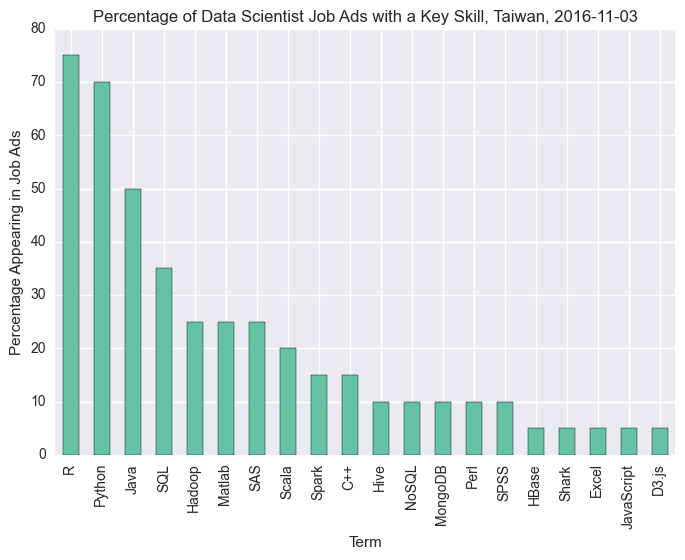

In [17]:
skills_info_TW104()

#### 31.10.2016

the "urllib2" package seems buggy and will request pages which are out of date. Let's use the "requests" (which uses the "urllib3") package instead.

http://www.indeed.com/jobs?q=%22data+scientist%22&l=San Francisco%2C+CA
<div id="searchCount">Jobs 1 to 10 of 331</div>
num_pages= 34
Getting page 0 start_num= 0
http://www.indeed.com/jobs?q=%22data+scientist%22&l=San Francisco%2C+CA&start=0
['http://www.indeed.com/rc/clk?jk=f2e6a62acd9326ef&fccid=6576e7250aa78c3c', 'http://www.indeed.com/rc/clk?jk=70e57e900f9baa90&fccid=477cda8eacc52791', 'http://www.indeed.com/rc/clk?jk=73ac01b3006e5514&fccid=a089a346aa023259', 'http://www.indeed.com/rc/clk?jk=e467ea91abc30d4f&fccid=5609ae8cba643791', 'http://www.indeed.com/rc/clk?jk=41a5936d339a7eb8&fccid=07ed296255237854', 'http://www.indeed.com/rc/clk?jk=0d3546eff0950f3f&fccid=8510f9bc3a085f8e', 'http://www.indeed.com/company/Indeed-Prime/jobs/Data-Scientist-35b4be73776b07ef?r=1&fccid=72e9a6d69e66d858', 'http://www.indeed.com/rc/clk?jk=1c46b7bbb977cd7a&fccid=2476c0fe461fd7d3', 'http://www.indeed.com/rc/clk?jk=41055b6a577151a5&fccid=f766f8bfbc3effb7', 'http://www.indeed.com/rc/clk?jk=d5beea4b876073

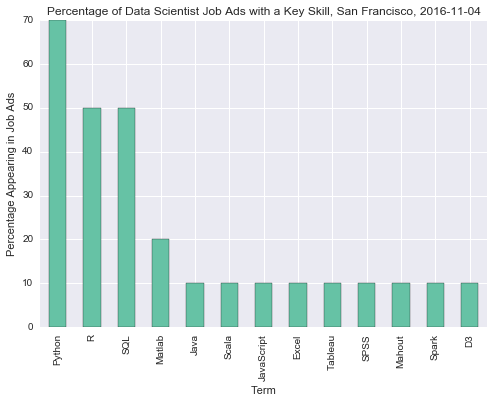

In [36]:
skills_info(city = 'San Francisco', state = 'CA') 

http://www.indeed.com/jobs?q=%22data+scientist%22&l=New York%2C+NY
<div id="searchCount">Jobs 1 to 10 of 389</div>
num_pages= 39
Getting page 0 start_num= 0
http://www.indeed.com/jobs?q=%22data+scientist%22&l=New York%2C+NY&start=0
['http://www.indeed.com/rc/clk?jk=82a65d3f9fbeda64&fccid=f17180ffbe436a3c', 'http://www.indeed.com/rc/clk?jk=cca60cdc64b03eb2&fccid=ef4ef175212ffb1e', 'http://www.indeed.com/rc/clk?jk=3b426d0c5ff59c9a&fccid=a02a309f2586b2dd', 'http://www.indeed.com/rc/clk?jk=f0266a80502011aa&fccid=35781c2041de2a91', 'http://www.indeed.com/cmp/Indeed-Prime/jobs/Data-Scientist-f51d618a67f9e1bd?r=1&fccid=72e9a6d69e66d858', 'http://www.indeed.com/rc/clk?jk=902c2bf4a0198c35&fccid=0c39fb2c91742dcf', 'http://www.indeed.com/rc/clk?jk=5989a8d562524941&fccid=61bb2b2cdd4507ae', 'http://www.indeed.com/rc/clk?jk=c3f5d205ee6b4d08&fccid=94f50d40391d59da', 'http://www.indeed.com/rc/clk?jk=4444b060ac85b8f0&fccid=f65aedcd2de292bf', 'http://www.indeed.com/rc/clk?jk=ce5ecae2e0077e61&fccid=3de83

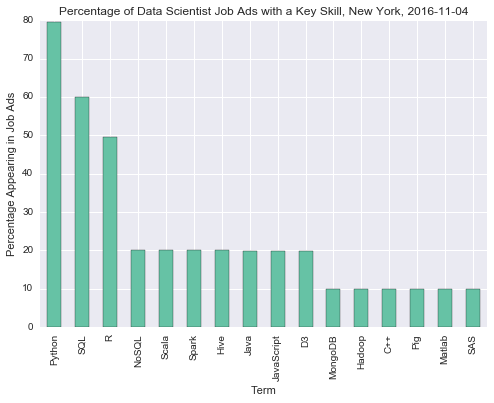

In [35]:
skills_info(city = 'New York', state = 'NY') 

----

http://wiki.jikexueyuan.com/project/python-crawler-guide/beautiful-soup.html
    
http://stackoverflow.com/questions/27346976/beautifulsoup-find-all-does-not-find-all